Abriendo el dataset

C:\Users\jose-\AppData\Local\Temp\ipykernel_3464\746695557.py:1: DtypeWarning: Columns (12,14,16,17,18,19,20,24,25,26,27,28,29,30,31,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('hltb_data.csv')


Hay 7160 juegos con rating ESRB
Hay 3631 juegos con rating PEGI
Hay 1872 juegos con rating CERO
En total hay 12663 juegos con rating
Total de géneros únicos iniciales: 247
Se encontraron 159 géneros con posibles similitudes
Género agregado: simulation
Hay 1 géneros únicos
Género agregado: action
Hay 2 géneros únicos
Género agregado: adventure
Hay 3 géneros únicos
Género agregado: role-playing
Hay 4 géneros únicos
Género agregado: action rpg
Hay 5 géneros únicos
Género agregado: first-person
Hay 6 géneros únicos
Género agregado: shooter
Hay 7 géneros únicos
Género agregado: racing/driving
Hay 8 géneros únicos
Género agregado: top-down
Hay 9 géneros únicos
Género agregado: puzzle
Hay 10 géneros únicos
Género agregado: music
Hay 11 géneros únicos
Género agregado: platform
Hay 12 géneros únicos
Género agregado: sports
Hay 13 géneros únicos
Género agregado: card game
Hay 14 géneros únicos
Género agregado: roguelike
Hay 15 géneros únicos
Género agregado: various
Hay 16 géneros únicos
Género 

C:\Users\jose-\AppData\Local\Temp\ipykernel_3464\2776148033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.dropna(subset=['game_profile_genre'], inplace=True)  # Eliminamos filas sin género


Géneros únicos encontrados: ['simulation', 'action', 'adventure', 'role-playing', 'rpg', 'first-person', 'shooter', 'racing', 'driving', 'top-down', 'puzzle', 'music', 'platform', 'sports', 'card', 'game', 'roguelike', 'various', 'arcade', 'visual', 'novel', 'scrolling', 'vertical', 'third-person', 'on-rails', 'open', 'world', 'pinball', 'side', 'point-and-click', 'text', 'real-time', 'strategy', 'city-building', 'shoot-em-up', 'combat', 'flight', 'simulator', 'vehicular', 'sandbox', 'trivia', 'compilation', 'fighting', 'turn-based', 'tactical', 'survival', 'horror', 'massively', 'multiplayer', 'educational', 'historical', 'hack-and-slash', 'isometric', '3d', 'beat-em-up', 'stealth', 'hidden', 'object', 'rhythm', 'life', 'tower', 'defense', 'party', 'virtual', 'reality', 'multidirectional', 'light-gun', 'breakout', 'mecha', 'art', 'side-scroller', 'battle', 'arena', 'graphic', 'incremental', 'board', 'space', 'trading', 'tactics', 'casual', 'indie', 'interactive', 'american-football', 

C:\Users\jose-\AppData\Local\Temp\ipykernel_3464\277756356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="twilight", edgecolor='w', linewidth=1.5,  zorder=2, alpha = 0.6)


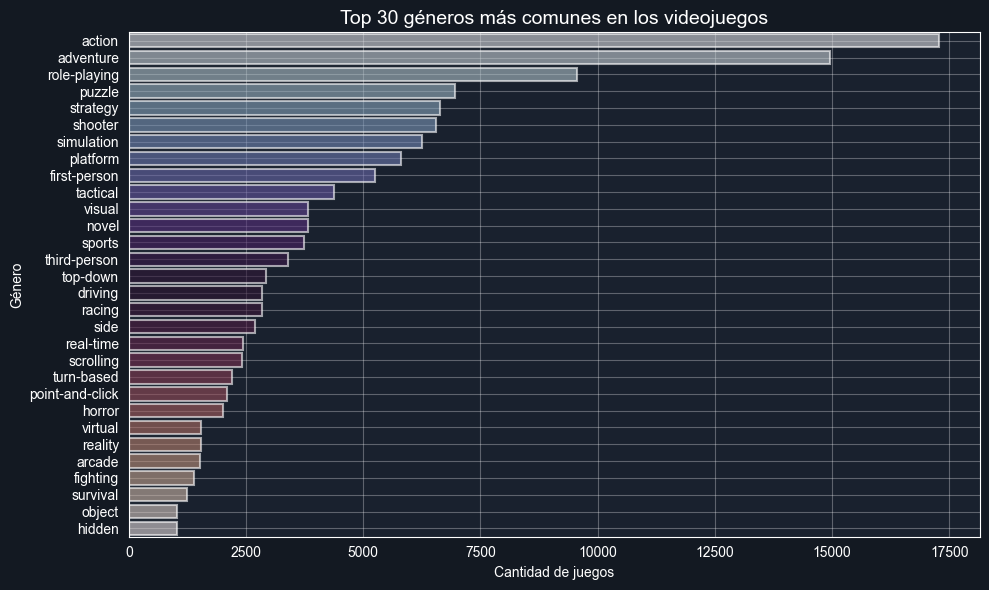

Hay 6906 juegos con rating
Hay 66112 juegos sin rating
Corresponde a un 9.46% de los juegos
Hay 70116 juegos con plataforma
Hay 2902 juegos sin plataforma
Corresponde a un 96.03% de los juegos
Hay 3574 plataformas únicas
game_game_type
game       66253
dlc         2226
multi       1816
sports       628
compil       590
endless      367
mod          331
hack         260
omit         182
delay         64
Name: count, dtype: int64
Hay 301 juegos sin tipo


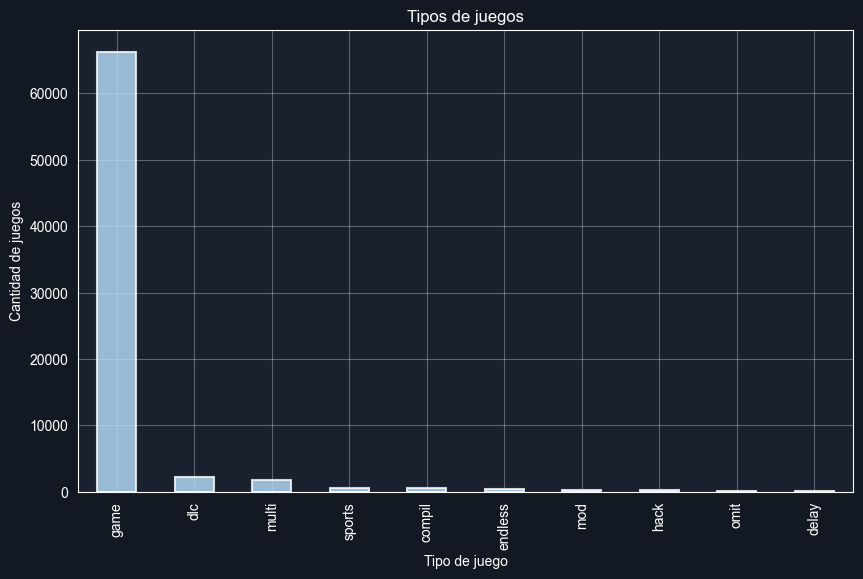

C:\Users\jose-\AppData\Local\Temp\ipykernel_3464\41632697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['game_comp_lvl'] = data_clean[['game_comp_lvl_sp', 'game_comp_lvl_co', 'game_comp_lvl_mp']].apply(lambda x:''.join(x.astype(str)), axis=1)


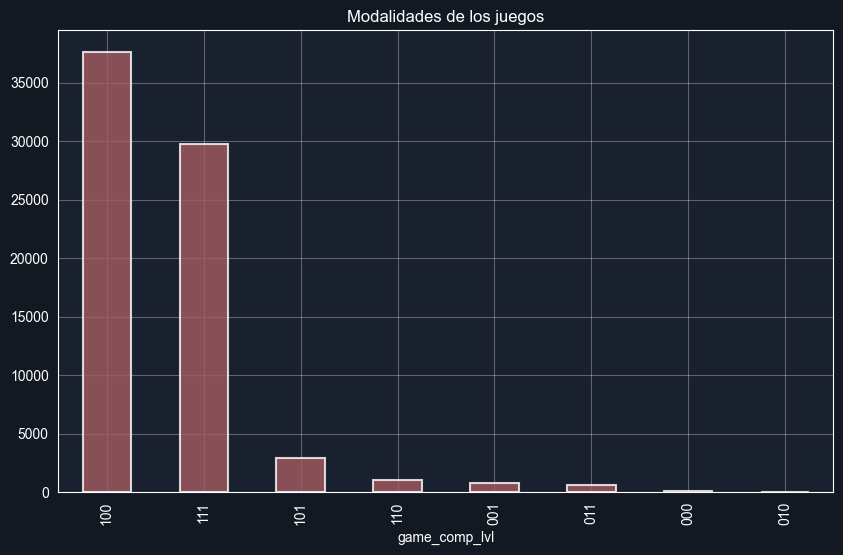

In [114]:
import pandas as pd
%run clean_data.ipynb

In [115]:
# Cargar CSV
df = data_clean

Se crea una tabla con atributos binarios para representar los generos de los juegos.

In [116]:
import pandas as pd

# Leer archivo de sinónimos
genre_map_df = pd.read_excel("genres_map.xlsx", header=None)

# Crear mapa de sinónimos → género principal
genre_map = {}
for row in genre_map_df.itertuples(index=False):
    row_values = [str(cell).strip() for cell in row if pd.notna(cell)]
    if not row_values:
        continue
    principal = row_values[0].strip().lower()  # género principal en minúsculas
    for synonym in row_values:
        genre_map[synonym.strip().lower()] = principal

# Subset del DataFrame
df_subset = df[['game_game_id', 'game_game_name', 'game_profile_genre']].copy()
df_subset['game_profile_genre'] = df_subset['game_profile_genre'].fillna('')

# Normalizar géneros usando el mapa (case-insensitive)
def normalize_genres(genre_str):
    genres = [g.strip().lower() for g in genre_str.split(',') if g.strip()]
    normalized = set()
    for g in genres:
        mapped = genre_map.get(g, g)  # busca en minúsculas
        normalized.add(mapped)
    return list(normalized)

df_subset['genre_list'] = df_subset['game_profile_genre'].apply(normalize_genres)

# Géneros únicos (normalizados, en minúsculas)
all_genres = sorted(set(g for sublist in df_subset['genre_list'] for g in sublist))

# Binarización
genre_df = pd.DataFrame(
    [[1 if genre in genres else 0 for genre in all_genres] for genres in df_subset['genre_list']],
    columns=all_genres
)

# Concatenar con los datos originales
df_game_genre_binary = pd.concat([df_subset[['game_game_id', 'game_game_name']], genre_df], axis=1)

# Vista preliminar
df_game_genre_binary.head()


,game_game_id,game_game_name,2d action platformer,2d versus fighting,3d,3d platformer,4x,action,action adventure,action driving,action role-playing,action rpg,action shooter,action/ adventure-puzzle,action/platform,ad,adventure,american-football,anazign,arcade,arcade shooter,arcade soccer,arcade/shoot 'em up,arena fighting,art,art game,artillery,battle arena,beat,beat-em-up,board game,brawler,breakout,business simulation game,card,card battle,card game,casual,cinematic platformer,city-building,collectible card game,combat flight simulator,combat simulation,compilation,computer role-playing,console role-playing,console rpg,construction,construction management simulation,date simulation,driving,dungeon crawl,educational,edutainment,exercise,extreme sports,family,family games,fantasy first-person shooter,farm simulation,fighting,fighting action,first-person,first-person adventure,first-person shooter,fishing,fitness,flight,flight combat,flight simulation,flying platformer,fmv,fps,fvm,game show,god game,grand strategy,graphic adventure,hack-and-slash,hidden object,historical,historical action adventure,historical real-time,horror,http://prinnies.com/,http://www.cobramobile.com/,incremental,indie,interactive art,interactive fiction,isometric,kickboxing,life simulation game,light-gun,light-gun shooter,management,massively multiplayer,massively multiplayer online role-playing game,maze,mecha,mecha simulation,medical simulation,medieval fantasy action,mini-game,mini-game compilation,multi-directional shooter,multidirectional,multidirectional shooter,multiplayer battle arena,music,music/fighting,music/rhythm,mystery,on-rails,open world,party,pinball,platform,platform/puzzle,point-and-click,point-and-click adventure,professional wrestling,pub games,puzzle,puzzle card,puzzle platforming,puzzle rpg,racing/driving,real-time,real-time grand strategy,real-time strategy,real-time tactical rpg,real-time tactics,rhythm,roguelike,role-playing,rpg,rts,rts/rpg,run gun,sandbox,sci-fi puzzle platform game,scrolling,shoot-em-up,shooter,side,side-scroller,simulation,soccer,social,space combat,space combat simulation,space combat simulator,space simulation,space trading,sports,stealth,stealth action,stealth-based game,steampunk,strategy,strategy side-scroller,strategy-rpg,strategy/tactical,strategy/tactical/tower defense,submarine simulator,survival,survival horror,tactical,tactical action,tactical role-playing,tactical rpg,tactical shooter,text,third person shooter,third person tactical shooter,third-person,third-person action adventure,third-person shooter,third-person shooter sandbox,top-down,top-down shooter,tower defense,trivia,turn-based,turn-based role-playing,turn-based strategy,turn-based tactical,turn-based tactics,twin stick shooter,various,vehicle simulation,vehicular combat,versus fighting,vertical scrolling shooter,vertical shooter,virtual pet,virtual reality,visual novel,war,weapon-based fighting,western,wrestling
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Se crea una tabla con atributos binarios para representar las plataformas de los juegos.

In [117]:
# Nos quedamos con las columnas relevantes
df_subset = df[['game_game_id', 'game_game_name', 'game_profile_platform']].copy()

# Rellenar valores nulos con string vacío
df_subset['game_profile_platform'] = df_subset['game_profile_platform'].fillna('')

# Separar las plataformas por coma y eliminar espacios extra
df_subset['platform_list'] = df_subset['game_profile_platform'].apply(
    lambda x: [p.strip() for p in x.split(',') if p.strip() != '']
)

# Obtener todas las plataformas únicas
all_platforms = sorted(set(p for sublist in df_subset['platform_list'] for p in sublist))

# Crear un DataFrame con las columnas de plataforma (1 si el juego está en esa plataforma, 0 si no)
platform_df = pd.DataFrame(
    [[1 if platform in platforms else 0 for platform in all_platforms] for platforms in df_subset['platform_list']],
    columns=all_platforms
)

# Concatenar con el DataFrame original
df_plataform_binary = pd.concat([df_subset[['game_game_id', 'game_game_name']], platform_df], axis=1)

df_plataform_binary.head()

,game_game_id,game_game_name,3DO,Acorn Archimedes,Amazon Luna,Amiga,Amiga CD32,Amstrad CPC,Apple II,Arcade,Atari 2600,Atari 5200,Atari 7800,Atari 8-bit Family,Atari Jaguar,Atari Jaguar CD,Atari Lynx,Atari ST,BBC Micro,Browser,ColecoVision,Commodore 64,Commodore PET,Commodore VIC-20,Dreamcast,Emulated,Evercade,FM Towns,FM-7,Game & Watch,Game Boy,Game Boy Advance,Game Boy Color,Game.com,Gear VR,Gizmondo,Google Stadia,Intellivision,Interactive Movie,Linux,MSX,Mac,Meta Quest,Mobile,N-Gage,NEC PC-88,NEC PC-98,NEC PC-FX,NES,Neo Geo,Neo Geo CD,Neo Geo Pocket,Nintendo 3DS,Nintendo 64,Nintendo DS,Nintendo GameCube,Nintendo Switch,Nintendo Switch 2,Oculus Go,Odyssey,Odyssey 2,OnLive,Ouya,PC,PC VR,Philips CD-i,PlayStation,PlayStation 2,PlayStation 3,PlayStation 4,PlayStation 5,PlayStation Mobile,PlayStation Now,PlayStation Portable,PlayStation VR,PlayStation Vita,Playdate,Playstation 2,Plug & Play,SG-1000,Sega 32X,Sega CD,Sega Game Gear,Sega Master System,Sega Mega Drive/Genesis,Sega Pico,Sega Saturn,Sharp X1,Sharp X68000,Super Nintendo,Tiger Handheld,TurboGrafx-16,TurboGrafx-CD,Vectrex,Virtual Boy,Wii,Wii U,Windows Phone,WonderSwan,Xbox,Xbox 360,Xbox One,Xbox Series X/S,ZX Spectrum,ZX81,Zeebo
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,'Splosion Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.0,.hack//G.U. Vol. 1: Rebirth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,.hack//G.U. Vol. 2: Reminisce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se crea una tabla con atributos binarios para representar los tipos de los juegos.

In [118]:
# Nos quedamos con las columnas relevantes
df_subset = df[['game_game_id', 'game_game_name', 'game_game_type']].copy()

# Rellenar valores nulos con string vacío
df_subset['game_game_type'] = df_subset['game_game_type'].fillna('')

# Separar las plataformas por coma y eliminar espacios extra
df_subset['game_type_list'] = df_subset['game_game_type'].apply(
    lambda x: [p.strip() for p in x.split(',') if p.strip() != '']
)

# Obtener todas las plataformas únicas
all_platforms = sorted(set(p for sublist in df_subset['game_type_list'] for p in sublist))

# Crear un DataFrame con las columnas de plataforma (1 si el juego está en esa plataforma, 0 si no)
platform_df = pd.DataFrame(
    [[1 if platform in platforms else 0 for platform in all_platforms] for platforms in df_subset['game_type_list']],
    columns=all_platforms
)

# Concatenar con el DataFrame original
df_game_type_binary = pd.concat([df_subset[['game_game_id', 'game_game_name']], platform_df], axis=1)

df_game_type_binary.head()

,game_game_id,game_game_name,compil,delay,dlc,endless,game,hack,mod,multi,omit,sports
0,1.0,688(I) Hunter/Killer,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2.0,Beyond Good & Evil 2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,18.0,'Splosion Man,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,19.0,.hack//G.U. Vol. 1: Rebirth,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20.0,.hack//G.U. Vol. 2: Reminisce,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Uniendo dataframes

In [119]:

df_join = df \
    .merge(df_game_genre_binary, on=['game_game_id', 'game_game_name'], how='left') \
    .merge(df_plataform_binary, on=['game_game_id', 'game_game_name'], how='left') \
    .merge(df_game_type_binary, on=['game_game_id', 'game_game_name'], how='left')



Aplicar PCA con escalado

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


X = df_join.select_dtypes(include='number').dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=150) # TODO definir bien
X_pca_scaled = pca.fit_transform(X_scaled)
X_pca = pca.fit_transform(X)

### K-means

aplicar k-means sobre escalado con distintos valores de K

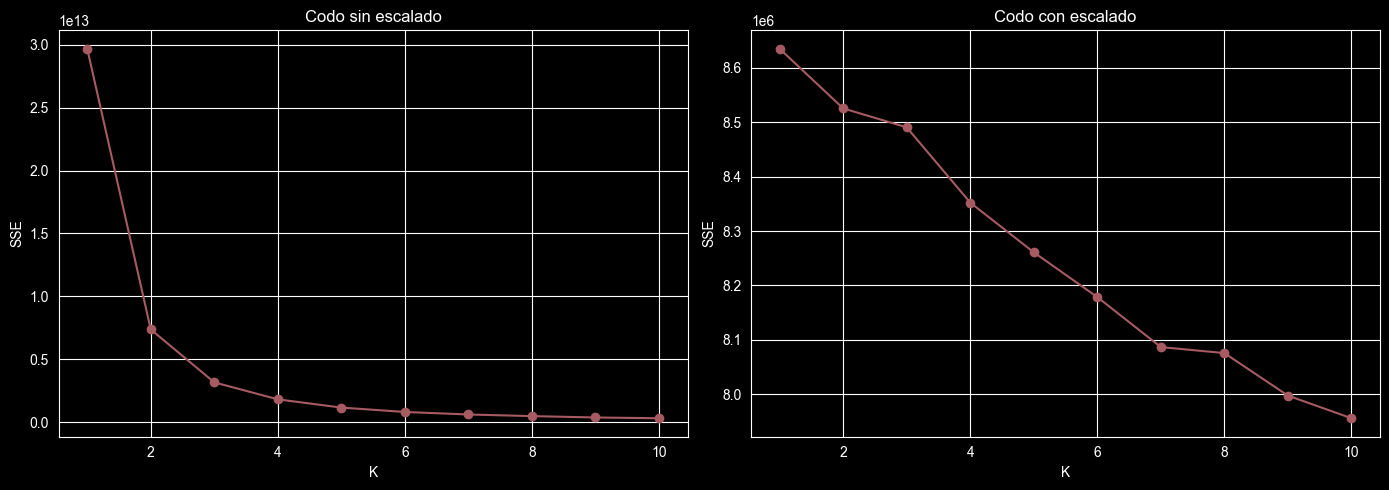

In [121]:
def plot_elbow(X_pca_data, title, ax):
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X_pca_data)
        sse.append(kmeans.inertia_)
    ax.plot(range(1, 11), sse, marker='o')
    ax.set_title(title)
    ax.set_xlabel('K')
    ax.set_ylabel('SSE')
    ax.grid(True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_elbow(X_pca, 'Codo sin escalado', axes[0])
plot_elbow(X_pca_scaled, 'Codo con escalado', axes[1])
plt.tight_layout()
plt.show()


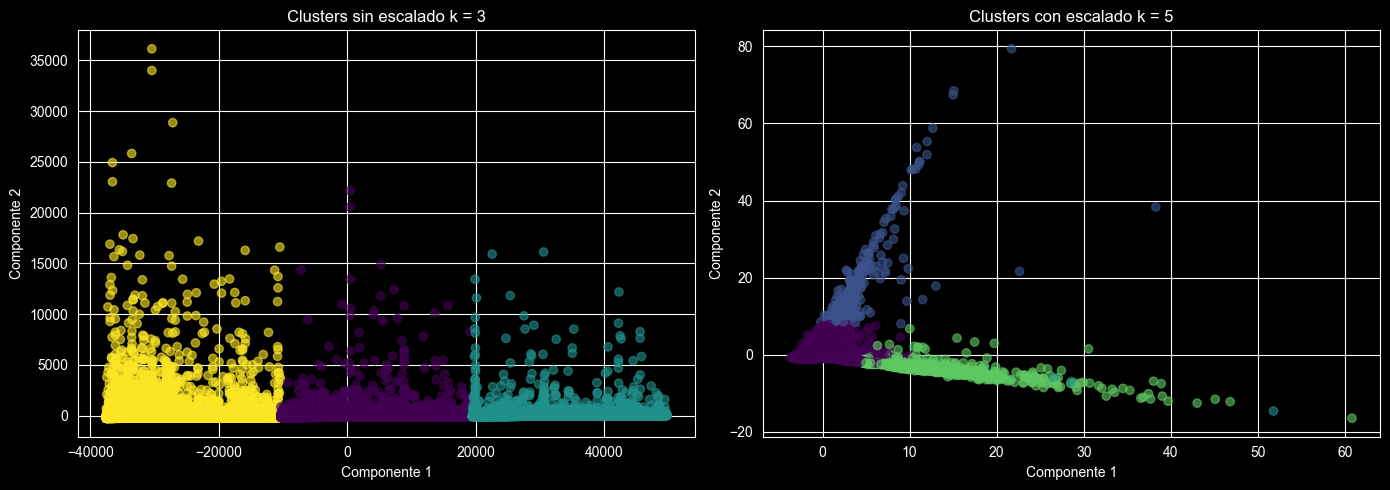

In [122]:
def plot_clusters(X_pca_data, title, ax, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_pca_data)
    ax.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_clusters(X_pca, f'Clusters sin escalado k = 3', axes[0], 3)
plot_clusters(X_pca_scaled, f'Clusters con escalado k = 5', axes[1], 5)
plt.tight_layout()
plt.show()

### DBSCAN

aplicar DBSCAN sobre escalado con distintos valores de K

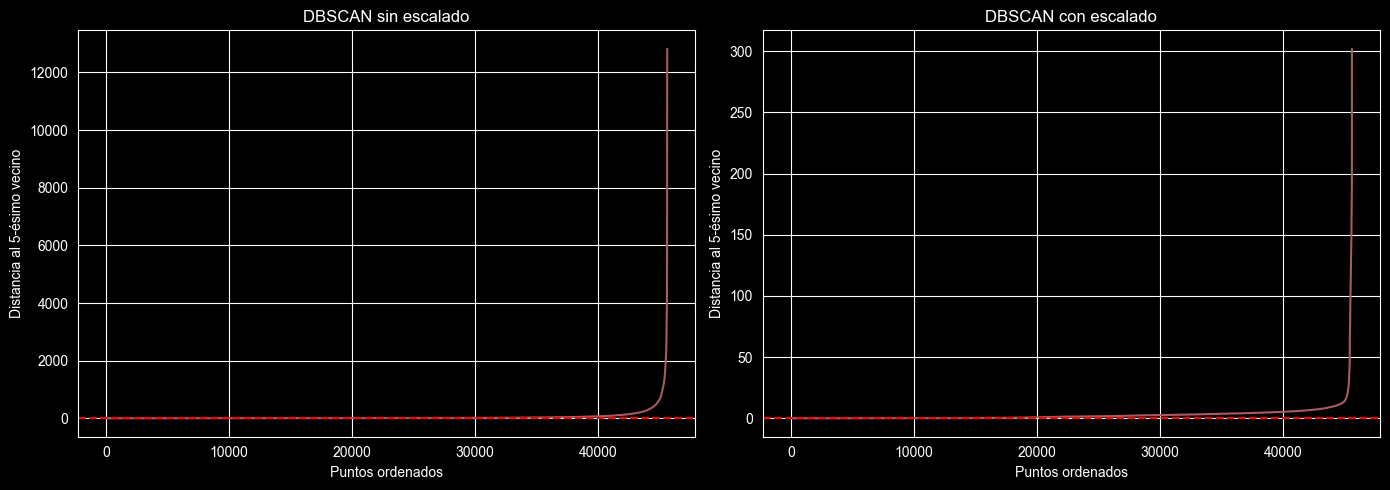

In [123]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

def plot_k_distances(X_pca_data, title, ax, k=5):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_pca_data)
    distances, _ = neighbors_fit.kneighbors(X_pca_data)
    k_distances = np.sort(distances[:, k-1])
    ax.plot(k_distances)
    ax.axhline(y=0.5, color='r', linestyle='--')
    ax.set_title(title)
    ax.set_xlabel('Puntos ordenados')
    ax.set_ylabel(f'Distancia al {k}-ésimo vecino')
    ax.grid(True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_k_distances(X_pca, 'DBSCAN sin escalado', axes[0])
plot_k_distances(X_pca_scaled, 'DBSCAN con escalado', axes[1])
plt.tight_layout()
plt.show()

DBSCAN sin escalado: 0 clusters encontrados
DBSCAN con escalado: 0 clusters encontrados


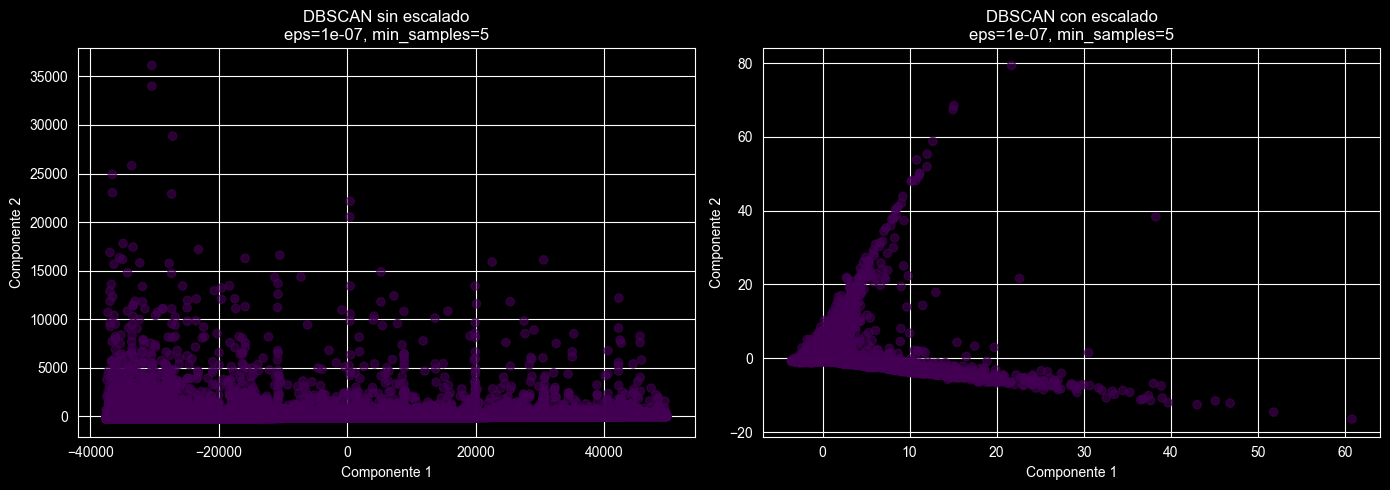

In [124]:
def plot_dbscan(X_pca_data, title, ax, eps, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_pca_data)

    # Calcular número de clusters
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"{title}: {n_clusters} clusters encontrados")

    scatter = ax.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(f"{title}\neps={eps}, min_samples={min_samples}")
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')

eps_unscaled = 0.0000001
eps_scaled = 0.0000001

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_dbscan(X_pca, 'DBSCAN sin escalado', axes[0], eps=eps_unscaled)
plot_dbscan(X_pca_scaled, 'DBSCAN con escalado', axes[1], eps=eps_scaled)
plt.tight_layout()
plt.show()

El resultado anterior deja claro que el aproximamiento correcto para resolver este problema no es mediante uso de DBSCAN